<a href="https://colab.research.google.com/github/PabloCaSan/Portfolio/blob/main/RN_DeteccionNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de números de imagen a texto

Se entrenará una red neuronal para la detección de números a partir de imágenes. Se usará el dataset "mnist" que viene con tensorflow. La red neuronal deberá ser capaz de detectar y clasificar correctamente imágenes de números del 0 al 9

Cargamos las librerías que usaremos

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

Cargamos el dataset

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

In [3]:
train_dataset, test_dataset = dataset['train'], dataset['test']

Creamos un arreglo de etiquetas para las categorías de los números

In [4]:
class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

Dividimos la información para entrenar y para evaluar

In [5]:
train_examples = metadata.splits['train'].num_examples
test_examples = metadata.splits['test'].num_examples

Creamos y aplicamos una función de normalización, para poder interpretar las imágenes pixel a pixel

In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [7]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

Definimos la estructura de la red neuronal. La capa de entrada recibirá imágenes de 28 x 28 pixeles, habrá dos capas ocultas con función de activación relu, y la capa de salida utilizará una función softmax para clasificar los resultados

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  tf.keras.layers.Dense(64, activation = tf.nn.relu),
  tf.keras.layers.Dense(64, activation = tf.nn.relu),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

Definimos el optimizador, la función de pérdida y evaluamos la precisión

In [9]:
model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = 'accuracy'
)

El aprendizaje se hará por lotes de forma aleatoria

In [10]:
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

Aplicamos el modelo

In [11]:
model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 20s 4ms/step - loss: 0.2728 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1247 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0712 - accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0564 - accuracy: 0.9822


Evaluamos la precisión del modelo

In [12]:
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(test_examples/32)
)
print("Precisión del modelo: ", test_accuracy*100, '%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0982 - accuracy: 0.9718
Precisión del modelo:  97.18000292778015 %


Veamos los resultados de forma gráfica

Cargamos los datos de las imágenes y etiquetas de prueba y las comparamos con las predicciones del modelo

In [13]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)


Creamos la representación gráfica, se mostrará el número en imagen y la etiqueta que le asignó el modelo. Para imágenes correctamente clasificadas se mostrará la etiqueta de color azul, mientras que la etiqueta será roja para imágenes mal clasificadas

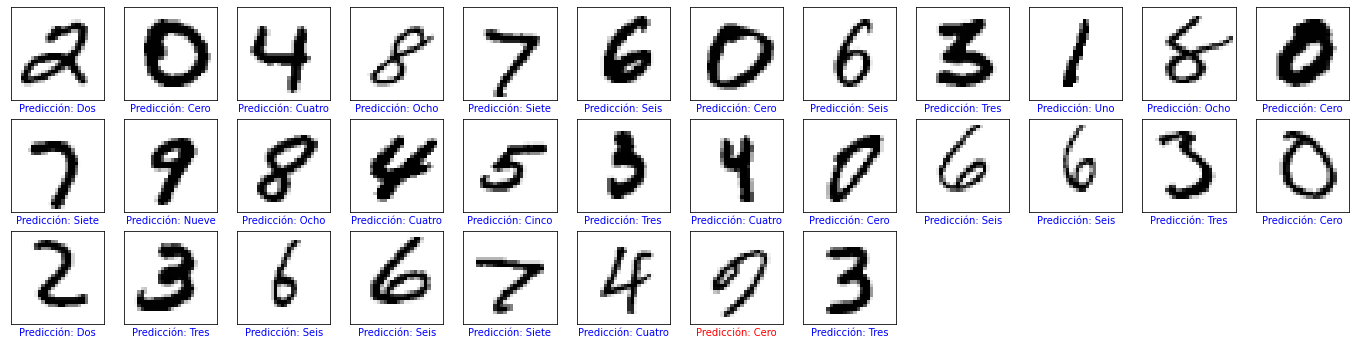

In [14]:
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Predicción: {}".format(class_names[predicted_label]), color=color)

numrows=6
numcols=6

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(BATCHSIZE):
	plt.subplot(numrows, 2*numcols, i+1)
	plot_image(i, predictions, test_labels, test_images)

plt.show()

Aparentemente el resulado es bueno, pero notemos que todos los números del dataset están centrados y son de un tamaño relativamente grande, así que podría haber errores al escribir números de tamaño mucho menor y en una esquina. Además como el objetivo del modelo es arrojar resultados de números, aunque hiciéramos un garabato, éste le asignaría un número